In [ ]:
# This notebook is a first step to gather variables to build a multivariate regression model to determine 
# which sociodemographic characteristics are correlated to the occurence of property tax deliquency.

In [1]:
# import modules

import pandas as pd
import numpy as np
import os

In [2]:
# create a dataframe from table output of tax property feature class spatially joined to 
# demographic blockgroup feature class

df = pd.read_csv(r"C:\Data\TaxPropDataByBG.csv")
df.head(10)

,NAME,WAGEBASECY,MEDWAGE_CY,WHTMBASECY,MEDWMAGECY,WHTFBASECY,MEDWFAGECY,BAGEBASECY,MEDBAGE_CY,BLKMBASECY,...,ForRent,RentVacant,ForSale,SoldVacant,SeasonalVacant,MigrantVacant,OtherVacant,JoinID,TaxLienCount,LienArea
0,60014001.0,2088,58.7,1077,58.2,1011,59.3,121,51.7,71,...,0,0,12,24,25,0,0,60014001001,116.0,90589.946770
1,60014002.0,825,47.6,413,46.3,412,49.2,5,47.5,2,...,0,0,0,0,7,0,6,60014002001,2.0,1426.449516
2,60014002.0,801,38.5,402,39.0,399,38.0,25,52.9,13,...,0,0,0,0,0,0,0,60014002002,3.0,2431.695180
3,60014003.0,899,43.3,427,42.6,472,44.0,36,43.3,16,...,0,0,0,0,0,0,44,60014003001,1.0,632.811704
4,60014003.0,994,40.9,480,40.4,514,41.4,88,45.4,29,...,61,0,0,0,0,0,0,60014003002,2.0,1373.922914
5,60014003.0,607,41.5,288,41.2,319,42.0,301,44.5,145,...,14,0,0,0,51,0,0,60014003003,4.0,5396.417035
6,60014003.0,1011,47.4,487,45.1,524,48.7,48,61.3,16,...,15,0,0,0,0,0,46,60014003004,2.0,1105.816097
7,60014004.0,1111,41.6,515,41.8,596,41.4,51,38.1,25,...,0,0,0,0,0,0,28,60014004001,5.0,3635.735511
8,60014004.0,787,39.9,386,39.9,401,39.9,232,48.6,107,...,61,0,0,0,0,0,10,60014004002,6.0,3044.340484
9,60014004.0,753,35.8,365,36.0,388,35.5,127,45.6,58,...,0,0,0,0,0,0,30,60014004003,2.0,1353.591850


In [3]:
# calculate number of tax lien properties per area
df['TaxLCbyArea'] = df['LienArea']/df['TaxLienCount']

In [4]:
# remove larger area records as outliers and calculate preliminary summary stats
df = df[df.TaxLCbyArea < 1700] 
df['TaxLCbyArea'].describe()


count     709.000000
mean      880.284667
std       319.340453
min        24.140427
25%       659.659117
50%       840.785426
75%      1073.891064
max      1699.687401
Name: TaxLCbyArea, dtype: float64

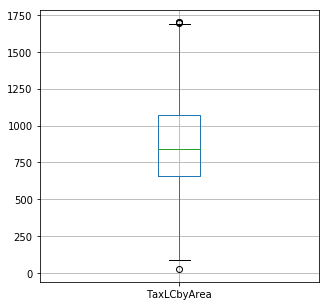

In [42]:
# make boxplot for summary stats visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df.boxplot('TaxLCbyArea', figsize=(5,5), sym=None)

In [5]:
# create visualizations for heatmap and bivariate scatterplots to determine proper variables for multivariate regression
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.model_selection import cross_val_score
from sklearn import (
    metrics, 
    linear_model, 
    ensemble,
)

from sklearn.linear_model import LinearRegression
from sklearn import feature_selection

In [27]:
#make dataframe for sociodemographic variables
ethDem = df[['WAGEBASECY',
'MEDWAGE_CY',
'WHTMBASECY',
'MEDWMAGECY',
'WHTFBASECY',
'MEDWFAGECY',
'BAGEBASECY',
'MEDBAGE_CY',
'BLKMBASECY',
'MEDBMAGECY',
'BLKFBASECY',
'MEDBFAGECY',
'IAGEBASECY',
'MEDIAGE_CY',
'AIMBASE_CY',
'MEDIMAGECY',
'AIFBASE_CY',
'MEDIFAGECY',
'AAGEBASECY',
'MEDAAGE_CY',
'ASNMBASECY',
'MEDAMAGECY',
'ASNFBASECY',
'MEDAFAGECY',
'TaxLienCount',
'LienArea',
'TaxLCbyArea']]

In [30]:
#make table for physical characteristics
physVars = df[['OwnOcc',
'RentOcc',
'BelPovHH',
'FamBelPovHH',
'MaleBelPovHH',
'FemBelPovHH',
'NonFamBelPovHH',
'TotVac',
'ForRent',
'RentVacant',
'ForSale',
'SoldVacant',
'SeasonalVacant',
'TaxLienCount',
'LienArea',
'TaxLCbyArea']]

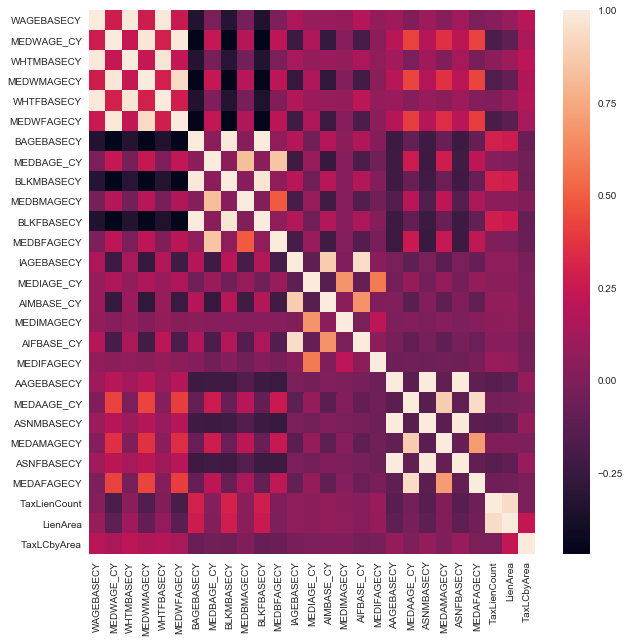

In [29]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(ethDem.corr(), ax=ax)

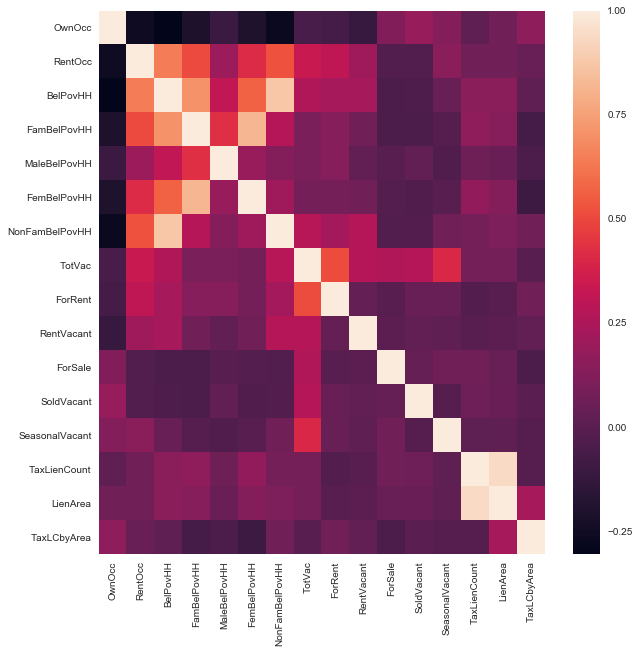

In [31]:
# regenerating heatmap after removing less significant variables
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(physVars.corr(), ax=ax)

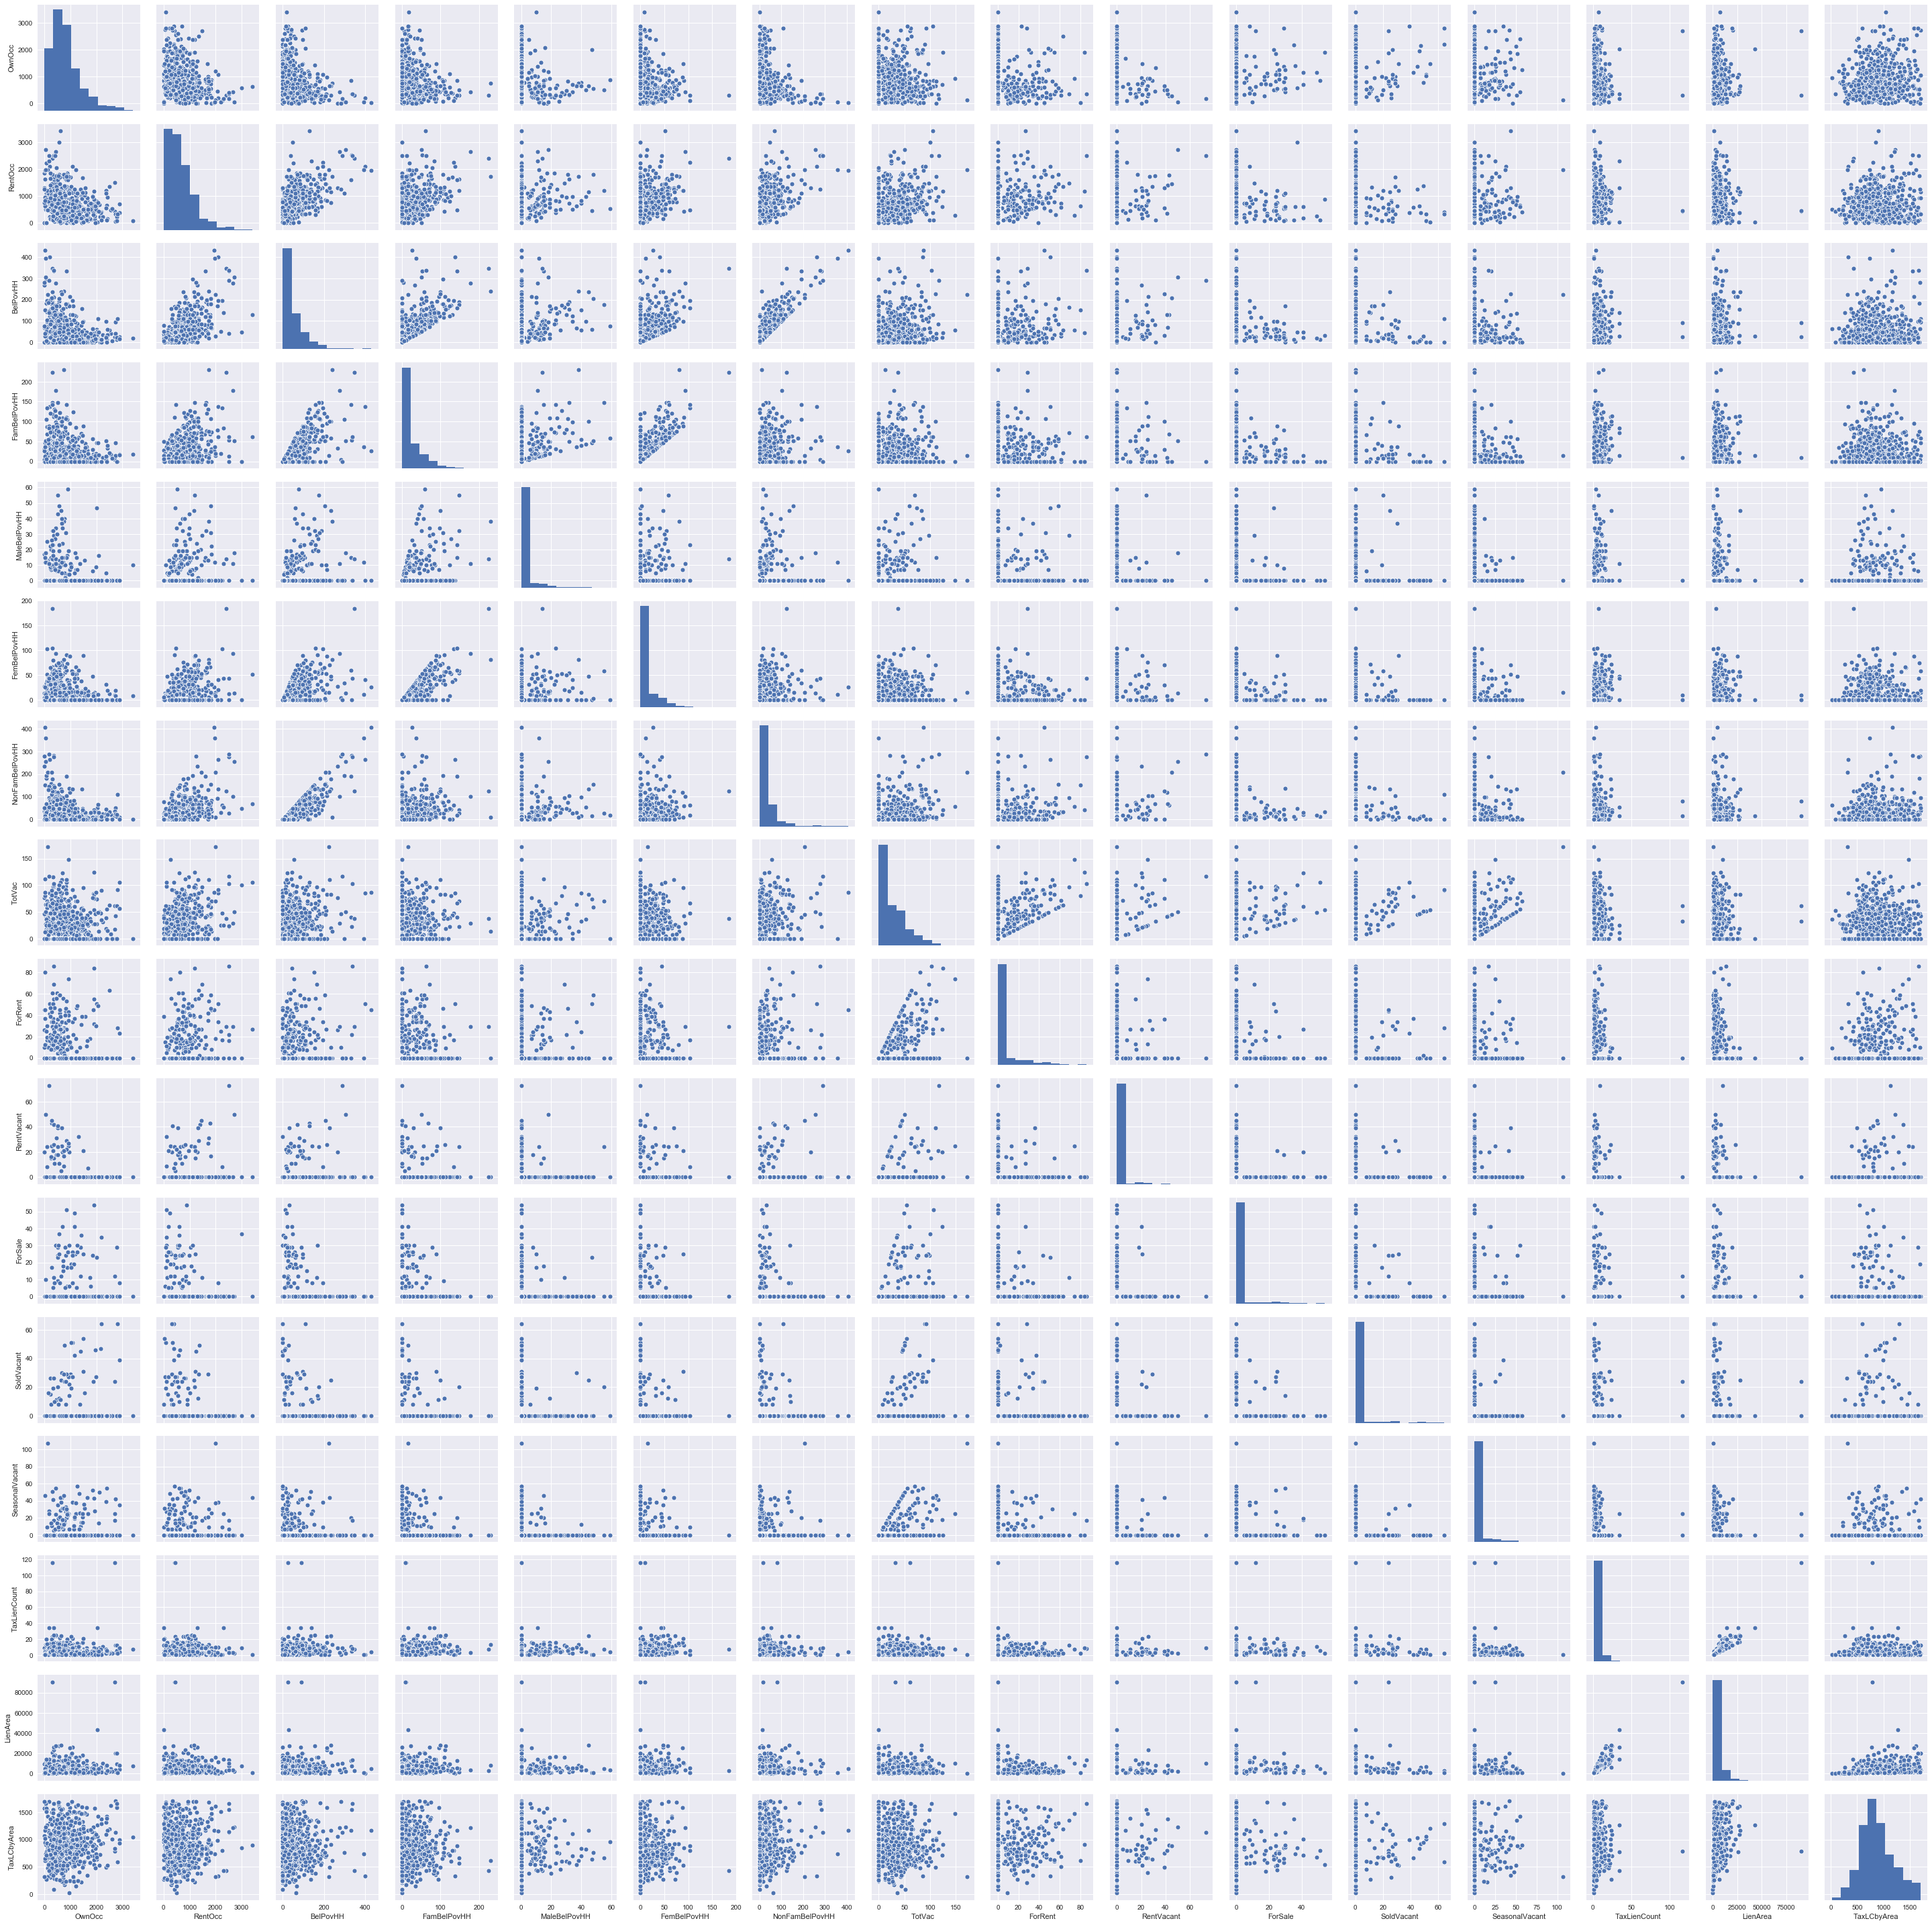

In [33]:
# more exploratory analysis, scatterplots

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')


g = sns.pairplot(physVars)

In [ ]:
# Many of the variables proved to be insignificant to the causes of tax deliquency. Will need to reexamine 
# data engineering of the independent variables and retrieve specific R-square values to build reliable multivariate 
# regression model.